## Hypothesis 2
To predict the incentive level requested for letting utility companies raise thermostat settings for 2-3 F when being at home in summer

### Filter: HomeSYN=1(i.e,ony use people who use A/C when being at home in summer)

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","HomeSYN","AwayWNY","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","SqftCate","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude",
    "Longitude", "Job","hot","cold","Ethnic"))];
sort(names(survey))

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"

In [2]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "8"       
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [3]:
#lets remove these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))

[1] 662  83
[1] 644  83


In [4]:
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"BillS",
"NBillS",
"Sqft",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"MC1",
"MC2",
"MC3",
"MC4",
"MC5",
"Frugal1",
"Frugal2",
"Frugal3",
"Trust1",
"Trust2",
"Trust3",
"Trust4",
"ComfNS1",
"ComfNS2",
"ComfNS3",
"ConvB1",
"ConvB2",
"ConvB3",
"ConvB4",
"ControlN1",
"ControlN2R",
"ControlN3",
"ControlN4",
"Atti1",
"Atti2",
"Atti3",
"Atti4",
"SubNorm1",
"SubNorm2",
"SubNorm3",
"PBC1",
"PBC2",
"PBC3R",
"PBC4",
"PBC5",
"SN1",
"SN2",
"SN3",
"SN4",
"HabitC1",
"HabitC2",
"HabitC3",
"HabitC4",
"HabitC5",
"HabitC6",
"HabitC7",
"HabitE1",
"HabitE2",
"HabitE3")

In [5]:
data1 <- data[data$HomeSYN==1,c("IncAutoS",IVS)];

names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "BillS"     
 [6] "NBillS"     "Sqft"       "SqftCate"   "HouseholdS" "Political" 
[11] "Ethnic"     "Income"     "Educ"       "MC1"        "MC2"       
[16] "MC3"        "MC4"        "MC5"        "Frugal1"    "Frugal2"   
[21] "Frugal3"    "Trust1"     "Trust2"     "Trust3"     "Trust4"    
[26] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ConvB1"     "ConvB2"    
[31] "ConvB3"     "ConvB4"     "ControlN1"  "ControlN2R" "ControlN3" 
[36] "ControlN4"  "Atti1"      "Atti2"      "Atti3"      "Atti4"     
[41] "SubNorm1"   "SubNorm2"   "SubNorm3"   "PBC1"       "PBC2"      
[46] "PBC3R"      "PBC4"       "PBC5"       "SN1"        "SN2"       
[51] "SN3"        "SN4"        "HabitC1"    "HabitC2"    "HabitC3"   
[56] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
[61] "HabitE2"    "HabitE3"

[1] "IncHomeS" "8"       
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [6]:
data2 <- data1;
data2 <- na.omit(data2)

In [7]:
hiCor(data2,.75)

,BillS,NBillS,Sqft,SqftCate,MC1,MC2,Trust1,Trust3,Trust4,ComfNS1,ComfNS3,Atti1,Atti2,Atti3,Atti4,PBC2,PBC4,SN1,SN2
BillS,1.0000,0.967,0.4167,0.4066,-0.0089,-0.065,-0.1125,-0.1197,-0.1055,0.2587,0.1954,-0.026,-0.040,-0.0371,-0.0288,-0.109,-0.086,0.0520,0.0706
NBillS,0.9674,1.000,0.4055,0.3956,-0.0104,-0.067,-0.1143,-0.1177,-0.1073,0.2617,0.2001,-0.034,-0.050,-0.0426,-0.0277,-0.123,-0.108,0.0615,0.0746
Sqft,0.4167,0.405,1.0000,0.9689,0.1446,0.089,0.0145,0.0019,0.0375,0.0230,-0.0019,0.025,-0.016,0.0053,-0.0093,-0.092,-0.070,0.1158,0.1084
SqftCate,0.4066,0.396,0.9689,1.0000,0.1355,0.076,0.0050,-0.0043,0.0251,0.0281,0.0021,0.012,-0.030,-0.0126,-0.0267,-0.080,-0.061,0.1135,0.1125
MC1,-0.0089,-0.010,0.1446,0.1355,1.0000,0.791,0.1240,0.0688,0.1177,-0.0231,-0.0570,0.079,0.039,0.0566,0.0823,0.043,0.063,0.0574,0.0579
MC2,-0.0645,-0.067,0.0888,0.0756,0.7913,1.000,0.1261,0.0743,0.1178,-0.0421,-0.0297,0.080,0.031,0.0474,0.0891,0.081,0.121,0.0647,0.0592
Trust1,-0.1125,-0.114,0.0145,0.0050,0.1240,0.126,1.0000,0.7834,0.9122,0.0051,-0.0298,0.100,0.084,0.1182,0.0935,0.078,0.084,0.2142,0.2232
Trust3,-0.1197,-0.118,0.0019,-0.0043,0.0688,0.074,0.7834,1.0000,0.7709,0.0136,-0.0144,0.115,0.112,0.1115,0.1170,0.054,0.042,0.1992,0.2150
Trust4,-0.1055,-0.107,0.0375,0.0251,0.1177,0.118,0.9122,0.7709,1.0000,0.0043,-0.0339,0.101,0.079,0.1116,0.0974,0.076,0.092,0.2094,0.1960
ComfNS1,0.2587,0.262,0.0230,0.0281,-0.0231,-0.042,0.0051,0.0136,0.0043,1.0000,0.7511,-0.075,-0.070,-0.0460,-0.0635,0.020,0.022,0.0048,0.0042


In [8]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:40];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:40){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}

[1] 0.13
     MC3  MC5 Frugal1 Frugal3 ConvB1 Atti1 Atti2 Atti3 Atti4
PC1 -0.2 -0.2   -0.21   -0.21    0.2 -0.25 -0.24 -0.23 -0.24
[1] 0.2
    OwnRent NBillS  Sqft SqftCate Income Trust1 Trust3 Trust4   SN1   SN2   SN4
PC2   -0.22  -0.21 -0.23    -0.27  -0.22  -0.23  -0.22  -0.22 -0.24 -0.24 -0.21
[1] 0.26
    BillS NBillS SqftCate Trust1 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3
PC3  0.27    0.3     0.22  -0.24  -0.25  -0.23    0.24    0.23    0.22
[1] 0.31
    Trust1 Trust2 Trust3 Trust4 ComfNS1 ComfNS2 ComfNS3  PBC5
PC4  -0.26  -0.27  -0.23  -0.26   -0.27   -0.24   -0.29 -0.22
[1] 0.35
    OwnRent   MC1   MC2 ComfNS1 ComfNS2 ComfNS3  SN1  SN2  SN3  SN4
PC5    -0.2 -0.28 -0.26    0.26    0.22    0.26 0.26 0.26 0.21 0.26
[1] 0.39
      MC2 Frugal2 ConvB2 ConvB3 ConvB4 ControlN4
PC6 -0.23   -0.23  -0.25  -0.34  -0.35     -0.21
[1] 0.43
    Trust1 Trust2 Trust3 Trust4 Atti3   SN1   SN2   SN4
PC7   0.23   0.24   0.22   0.24  0.22 -0.23 -0.23 -0.21
[1] 0.46
    PBC1 PBC2 PBC4 PBC5 HabitC1 Hab

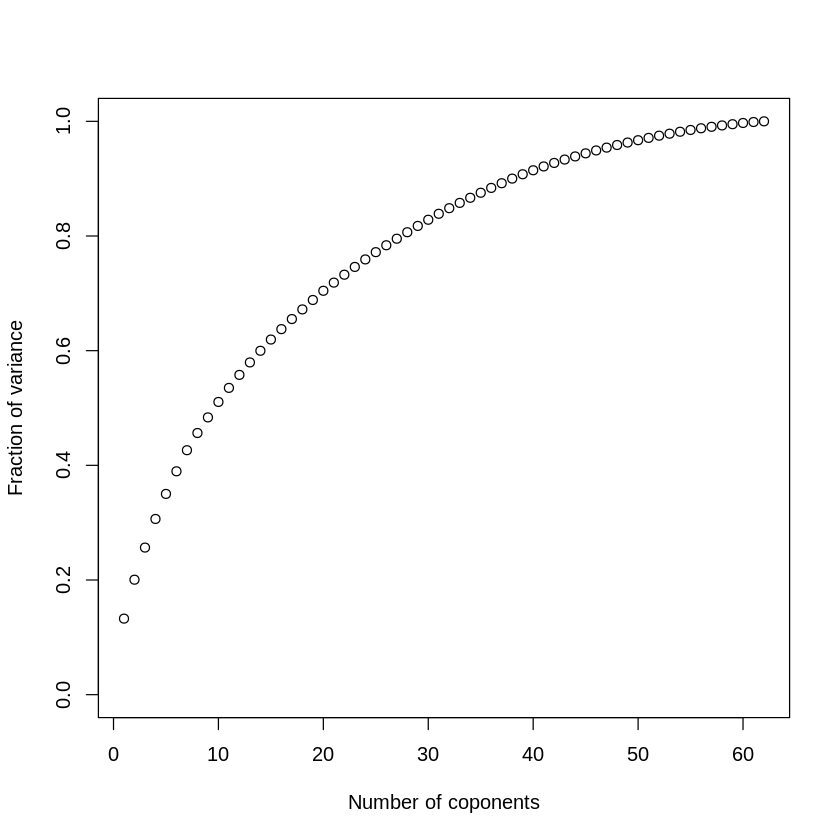

In [9]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [10]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

ComfNS3,28,0.68
MC1,14,0.67
MC2,15,0.67
ComfNS1,26,0.66
Trust2,23,0.64
SN4,52,0.64
Sqft,7,0.62
Frugal2,20,0.62
SubNorm2,42,0.60
Frugal3,21,0.59
ComfNS2,27,0.58


In [11]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])
fmla <- as.formula(paste("IncAutoS",paste(IndepPred,collapse="+"),sep="~"));
table(data2[,"IncAutoS"])


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 

In [12]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.892 -1.117 -0.107  1.098  4.836 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.74e+00   1.23e+00    2.23  0.02638 *  
ComfNS3      1.46e-01   6.80e-02    2.15  0.03185 *  
MC1          1.31e-02   7.04e-02    0.19  0.85301    
MC2          2.46e-02   7.50e-02    0.33  0.74277    
ComfNS1      7.65e-02   7.56e-02    1.01  0.31170    
Trust2      -3.95e-03   5.07e-02   -0.08  0.93787    
SN4          4.93e-02   5.14e-02    0.96  0.33735    
Sqft        -2.53e-05   7.93e-05   -0.32  0.74949    
Frugal2     -1.02e-01   9.00e-02   -1.14  0.25618    
SubNorm2    -1.47e-02   6.75e-02   -0.22  0.82736    
Frugal3     -1.78e-02   9.19e-02   -0.19  0.84678    
ComfNS2      9.37e-02   6.07e-02    1.54  0.12290    
Frugal1     -5.56e-02   1.09e-01   -0.51  0.61042    
MC5         -7.65e-02   8.71e-02   -0.88  0.38040    
ConvB4      -7.90e-03   5.71e-02   -0.14  0.89001  

In [13]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
ComfNS3,1,1.7e+02,166.007,57.101,1.6e-13
MC1,1,1.7e-01,0.171,0.059,8.1e-01
MC2,1,4.7e-01,0.466,0.160,6.9e-01
ComfNS1,1,1.7e+01,16.989,5.844,1.6e-02
Trust2,1,1.5e-01,0.145,0.050,8.2e-01
SN4,1,7.1e-01,0.712,0.245,6.2e-01
Sqft,1,3.7e-01,0.373,0.128,7.2e-01
Frugal2,1,1.9e+01,18.922,6.508,1.1e-02
SubNorm2,1,1.5e+00,1.503,0.517,4.7e-01
Frugal3,1,1.0e+00,1.038,0.357,5.5e-01


In [14]:
mod = lm(IncAutoS~ComfNS3+Age,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.823 -1.055 -0.180  0.983  4.793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.01932    0.28749    7.02  5.5e-12 ***
ComfNS3      0.28673    0.03961    7.24  1.3e-12 ***
Age          0.02096    0.00608    3.45    6e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 641 degrees of freedom
Multiple R-squared:  0.0959,	Adjusted R-squared:  0.093 
F-statistic:   34 on 2 and 641 DF,  p-value: 9.4e-15


In [15]:
mod = lm(IncAutoS~ComfNS3+Age+Political,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.798 -1.113 -0.153  0.987  4.640 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.22964    0.31086    7.17  2.0e-12 ***
ComfNS3      0.29276    0.03970    7.37  5.1e-13 ***
Age          0.02074    0.00607    3.42  0.00067 ***
Political   -0.05385    0.03056   -1.76  0.07860 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 640 degrees of freedom
Multiple R-squared:   0.1,	Adjusted R-squared:  0.096 
F-statistic: 23.8 on 3 and 640 DF,  p-value: 1.36e-14


In [16]:
mod = lm(IncAutoS~ComfNS3+Age+Political+HabitC2,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + Political + HabitC2, 
    data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.076 -1.129 -0.141  1.010  4.453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.82173    0.38146    7.40  4.4e-13 ***
ComfNS3      0.28515    0.03961    7.20  1.7e-12 ***
Age          0.02103    0.00604    3.48  0.00053 ***
Political   -0.05679    0.03044   -1.87  0.06254 .  
HabitC2     -0.09805    0.03695   -2.65  0.00816 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 639 degrees of freedom
Multiple R-squared:  0.11,	Adjusted R-squared:  0.104 
F-statistic: 19.8 on 4 and 639 DF,  p-value: 2.42e-15


In [17]:
mod = lm(IncAutoS~ComfNS3+Age+Political+HabitC2+PBC5,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + Political + HabitC2 + 
    PBC5, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.887 -1.108 -0.142  1.012  4.616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.37062    0.46659    7.22  1.4e-12 ***
ComfNS3      0.29017    0.03959    7.33  7.1e-13 ***
Age          0.02133    0.00603    3.54  0.00043 ***
Political   -0.06009    0.03041   -1.98  0.04860 *  
HabitC2     -0.08892    0.03713   -2.39  0.01692 *  
PBC5        -0.11317    0.05567   -2.03  0.04248 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.59e-15
